In [1]:
from mnist_read import load_mnist
import numpy as np

In [2]:
mnist = load_mnist(shuffle = True, one_hot = False)

Reading from saved pickle..
 - train-images shape :  (60000, 28, 28, 1)
 - test-images shape :  (10000, 28, 28, 1)
Load option.
 - normalize :  True
 - flatten :  False
 - one-hot coding :  False
 - shuffled :  True
Dataset columns.
 -  train_img
 -  train_label
 -  test_img
 -  test_label


In [3]:
mnist['test_label'][:3]

array([3, 7, 3], dtype=uint8)

In [4]:
# binary classifier
binary_train_5 = (mnist['train_label'] == 5)
binary_test_5 = (mnist['test_label'] == 5)


In [5]:
np.bincount(binary_train_5)
binary_train_5[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [6]:
# SGDclassifier
from sklearn.linear_model import SGDClassifier
reshaped_train = mnist['train_img'].reshape([-1, 784])

In [7]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [8]:
sgd_clf = SGDClassifier(max_iter = 5, random_state = 42)
sgd_clf.fit(reshaped_train, binary_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([reshaped_train[9]])

array([False])

In [10]:
import matplotlib.pyplot as plt


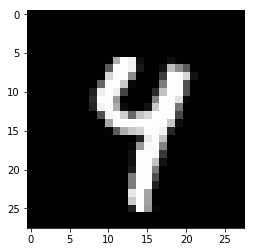

In [11]:
plt.imshow(mnist['train_img'][9].squeeze(2), cmap = 'gray')

In [12]:
## validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, reshaped_train, binary_train_5, cv=3, scoring='accuracy')

array([0.9652, 0.9692, 0.9598])

In [13]:
## confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [14]:
y_train_pred = cross_val_predict(sgd_clf, reshaped_train, binary_train_5, cv=3)

In [15]:
reshaped_test = mnist['test_img'].reshape([-1, 784])
confusion_matrix(binary_train_5, y_train_pred)

array([[53443,  1190],
       [  926,  4441]], dtype=int64)

In [16]:
#trainset = [binary_train_5, y_train_pred]

In [17]:
## confusion matrix
# [TN, FP]
# [FN, TP]
# precision = TP / TP + FP
# recall = TP / TP + FN
from sklearn.metrics import precision_score, recall_score
print(precision_score(binary_train_5, y_train_pred))
print(recall_score(binary_train_5, y_train_pred))

0.7886698632569703
0.8274641326625676


In [18]:
## f1 score(harmonic mean)
# 2 x precision * recall / (precision + recall) = TP / (TP + ( (FN+FP) / 2))
from sklearn.metrics import f1_score
f1_score(binary_train_5, y_train_pred)

0.8076013820694671

#### F-1 score(harmonic mean) ####
$$ 2 \times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN+FP}{2}} $$

#### F-n score ####
$$ F = \frac {1}{ \frac{\alpha}{precision} + \frac{(1- \alpha)}{recall} } 
= ( \beta^2 + 1) \times \frac{precision \times recall}{( \beta^2 \times precision + recall )}, \beta^2 = \frac{( 1 -\alpha )}{\alpha} $$

In [19]:
## decision fuction
y_score = sgd_clf.decision_function([reshaped_train[9]])
print(y_score)

[-5.80526764]


In [20]:
threshold = 2000
y_some_digit_pred = (y_score > threshold)
print(y_some_digit_pred)

[False]


In [21]:
y_scores = cross_val_predict(sgd_clf, reshaped_train, binary_train_5, cv=3, method='decision_function')

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(binary_train_5, y_scores)

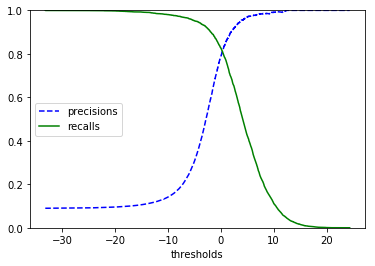

In [23]:
def _graph(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precisions')
    plt.plot(thresholds, recalls[:-1], 'g-', label = "recalls")
    plt.xlabel("thresholds")
    plt.legend(loc='center left')
    plt.ylim([0, 1])
    plt.show()
_graph(precisions, recalls, thresholds)

In [24]:
## receiver operating characteristic
from sklearn.metrics import roc_curve

#### receiver operation characteristic ####
ROC =  true positive rate(TPR) for false positive rate(FPR)

$$ FPR = \frac{FP}{FP + TN} = \frac{FP + TN - TN}{FP + TN} = 1 - \frac{TN}{FP + TN} = 1-TNR $$

In [25]:
fpr, tpr, threshold = roc_curve(binary_train_5, y_scores)

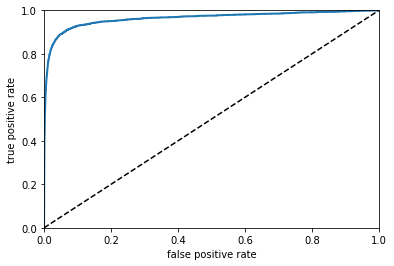

In [27]:
def plot_curve(fpr, tpr, threshold):
    plt.plot(fpr, tpr, linewidth = 2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()
plot_curve(fpr, tpr, _)

In [28]:
## AUC(area under the curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(binary_train_5, y_scores)

0.9633014627943491

In [29]:
## compare with RFC
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_forest = cross_val_predict(forest_clf, reshaped_train, binary_train_5, cv=3, method='predict_proba')

In [30]:
y_forest

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [31]:
y_scores_forest = y_forest[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(binary_train_5, y_scores_forest)

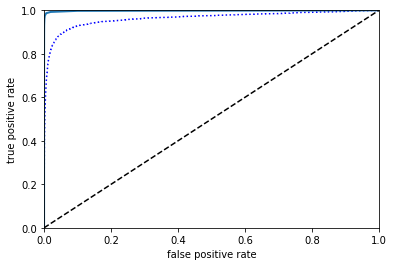

In [34]:
plt.plot(fpr, tpr, 'b:', label = "SGD")
plot_curve(fpr_forest, tpr_forest, _)

In [36]:
sgd_clf.fit(reshaped_train, mnist['train_label'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
sgd_clf.predict([reshaped_train[5]])

array([3], dtype=uint8)

In [42]:
some_score = sgd_clf.decision_function([reshaped_train[5]])
some_score

array([[-23.02977138, -13.04619042, -13.71392729,   9.91736489,
         -5.02711402,  -4.03416902, -15.71542332, -13.65752699,
        -16.88049725, -19.03934241]])